***
***

#Problem 1 [2 points]
Write Python code that implements the K-Means algorithm to classify the data generated below.
*   Use $K=5$
*   To reduce the sensitivity to initial conditions, your code should choose several (10) random initial conditions and then select the one that results in minimum total error.
*   Provide the final cost, $J$


#Problem 2 [3 points]
Repeat what you did in Problem 1, except this time, vary the number of clusters.
*   Use $K=2$, $K=4$, and $K=10$.   
*   To reduce the sensitivity to initial conditions, your code for each case should choose several (10) random initial conditions and then select the one that results in minimum total error.
*   Provide the minimum cost, $J_K$, for $K=2, 4, 10$

  Use the data that is generated in the following code to test your code.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2],
     [-1.5 ,  2],
     [-3,  1.8],
     [-3,  3],
     [-3,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=17)

Text(0, 0.5, '$x_2$')

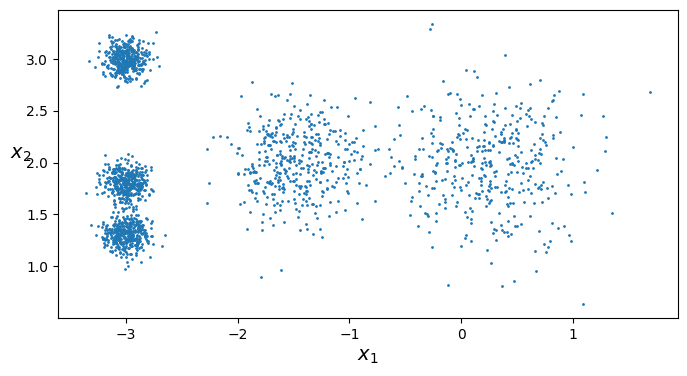

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1],  s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)


(Student's work begins here)

***Problem 1***

In [ ]:
import random
import copy

Functions:

In [ ]:
def generate_random_vector(x_range, y_range):
  x = random.uniform(x_range[0], x_range[1])
  y = random.uniform(y_range[0], y_range[1])
  xy = [x, y]
  return xy


def compare_nested_lists(a, b):
  if len(a) != len(b):
    return False
  else:
    for i in range(len(a)):
      if len(a[i]) != len(b[i]):
        return False
      else:
        for j in range(len(a[i])):
          for k in range(len(a[i][j])):
            if a[i][j][k] != b[i][j][k]:
              return False

  return True



def k_means(k, x_range, y_range):
  centers = []
  clusters = [None]*k
  for i in range(k):
    new_vec = generate_random_vector(x_range, y_range)
    centers.append(new_vec)
    clusters[i] = []
  done = False
  while done == False:
    previous_clusters = copy.deepcopy(clusters)
    clusters = [[] for c in range(k)]
    for vec in X:
      closest_center_index = -1
      distance = 100
      for j in range(k):
        d = np.sqrt((centers[j][0] - vec[0])**2 + (centers[j][1] - vec[1])**2)
        if d < distance:
          distance = d
          closest_center_index = j

      clusters[closest_center_index].append(vec)

    if compare_nested_lists(clusters, previous_clusters):
      done = True
    else:
      for l in range(k):
        if len(clusters[l]) > 0:
          cluster_array = np.array(clusters[l])
          x1_mean, x2_mean = np.mean(cluster_array, axis=0)
          centers[l] = [x1_mean, x2_mean]

  return centers


def iterate_k_means(k, x_range, y_range, iterations):
  index_lowest_error = -1
  lowest_error = 1000000
  all_center_sets = []
  for i in range(iterations):
    centers = k_means(k, x_range, y_range)
    all_center_sets.append(centers)
    J = 0

    for vec in X:
      distances = []
      for j in range(k):
        dist = np.sqrt((centers[j][0] - vec[0])**2 + (centers[j][1] - vec[1])**2)
        distances.append(dist)

      dist_min = min(distances)

      J += dist_min

    J /= len(X)

    if J < lowest_error:
      lowest_error = J
      index_lowest_error = i

  print("Lowest value of cost function: ", J)
  return(all_center_sets[index_lowest_error])



In [ ]:
x1_range = (-4, 2)
x2_range = (0, 4)
K = 5
iterations = 10

final_centers = iterate_k_means(K, x1_range, x2_range, iterations)

Lowest value of cost function:  0.290672876343901


Text(0, 0.5, '$x_2$')

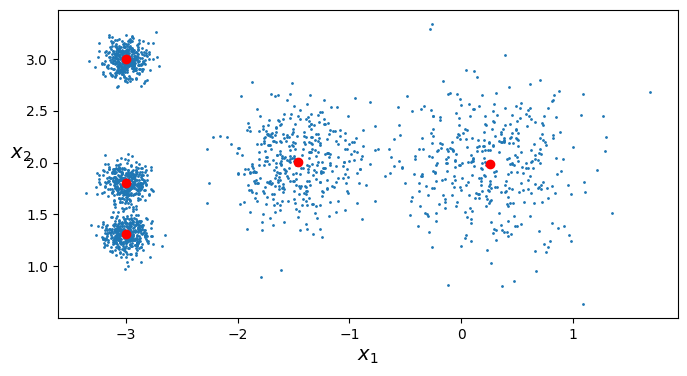

In [ ]:
centers_x = []
centers_y = []

for o in range(K):
  centers_x.append(final_centers[o][0])
  centers_y.append(final_centers[o][1])

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1],  s=1)
plt.scatter(centers_x, centers_y, color='r')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

***Problem 2***

For K = 2

Lowest value of cost function:  0.7579274548155894


Text(0, 0.5, '$x_2$')

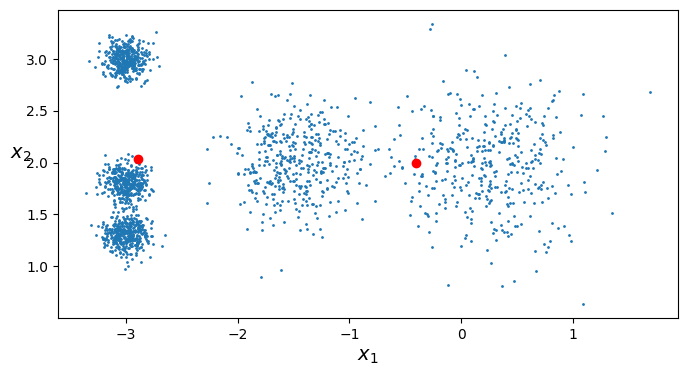

In [ ]:
K = 2

final_centers = iterate_k_means(K, x1_range, x2_range, iterations)

centers_x = []
centers_y = []

for o in range(K):
  centers_x.append(final_centers[o][0])
  centers_y.append(final_centers[o][1])

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1],  s=1)
plt.scatter(centers_x, centers_y, color='r')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

For K = 4

Lowest value of cost function:  0.3092469974256524


Text(0, 0.5, '$x_2$')

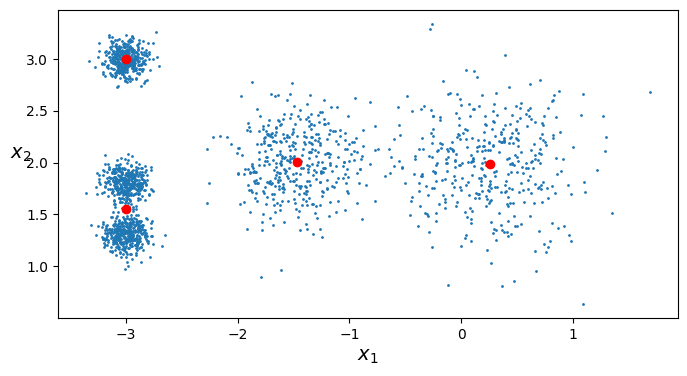

In [ ]:
K = 4

final_centers = iterate_k_means(K, x1_range, x2_range, iterations)

centers_x = []
centers_y = []

for o in range(K):
  centers_x.append(final_centers[o][0])
  centers_y.append(final_centers[o][1])

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1],  s=1)
plt.scatter(centers_x, centers_y, color='r')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

For K = 10

Lowest value of cost function:  0.18435411735785207


Text(0, 0.5, '$x_2$')

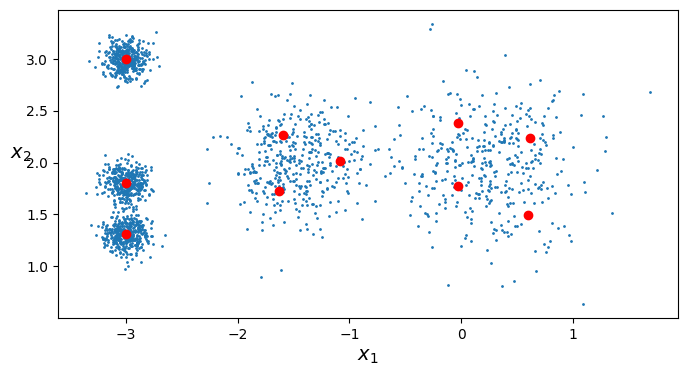

In [ ]:
K = 10

final_centers = iterate_k_means(K, x1_range, x2_range, iterations)

centers_x = []
centers_y = []

for o in range(K):
  centers_x.append(final_centers[o][0])
  centers_y.append(final_centers[o][1])

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1],  s=1)
plt.scatter(centers_x, centers_y, color='r')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)